---
layout: page
title: Tesla Ark Invest TSLA Price Targets
---

In [1]:
""" import library and package dependencies """
from sys import path
path.insert(0, '../src')
import pandas as pd
import matplotlib.dates as mdates

from chart_format import StandardChart, LogChart, PercentileChart

## Dear Elon: An Open Letter

On 7 August 2018 Musks' infamous "funding secured" tweet considered a potential buy back at $420 per share. Given TSLA was trading around $240 a share, that may have seemed a reasonably strong 2x return on investment. 

Two weeks later on 22 August 2018, Ark Invest CEO Cathy Woods published a blog titled "[Dear Elon: An Open Letter Against Taking Tesla Private](https://ark-invest.com/articles/analyst-research/tesla-private/)" in which Cathy explained the enormous disruptive growth potential over a long term (five year) time horizon.

Ark Invest's research and modeling forecast a bear, base and bull case scenario that suggested a 2023 price target somewhere between $700 and $4,000; significantly higher than the suggested $420 offer price, and subsequently a huge financial loss to investors should Tesla become a private company before these forecast gains were realized.

Thankfully for all investors, Tesla remained a public company and ARK Invest continue to publish research on disruptive innovation. The actual 1 July 2023 price of $175 before split adjustments would have been $2,625, close to Ark Invest's five year target base price.

Ark Invest have since updated and published four year price targets every year, usually around mid-April, although the forecast published on 12 June 2024 included a five year price target for 2029.

In [2]:
df_tsla = pd.DataFrame()
# Restore dataframe from previous notebook
%store -r df_tsla

In [3]:
""" Load data """
# Given price targets data is manually collected it is easier to use a markdown table than csv file
csv_file = '../data/tsla_PriceTargets.md'
# Read markdown table as csv format with '|' as separator and skip the row of '----' separators
df_targets = pd.read_csv('../data/tsla_PriceTargets.md', sep='|', skipinitialspace=True, skiprows=[1])
# Drop the first and last (empty) columns due to how the markdown table is imported
df_targets = df_targets.iloc[:, 1:-1]  
# Remove leading/trailing white spaces from column names
df_targets.columns = df_targets.columns.str.strip()
# Remove leading/trailing white spaces from data
df_targets = df_targets.map(lambda x: x.strip() if isinstance(x, str) else x)

In [4]:
""" Data Transformation """
df_targets['Date'] = pd.to_datetime(df_targets['TargetDate'],dayfirst=True)
df_targets['ForecastDate'] = pd.to_datetime(df_targets['ForecastDate'],dayfirst=True)
df_targets.set_index('Date', inplace=True)
df_targets = df_targets.sort_index()

In [5]:
""" Adjust price targets for stock splits """
def adjust_price(row, date, multiplier):
    if row['ForecastDate'] < pd.to_datetime(date):
        row['Bear'] = (row['Bear'] / multiplier)
        row['Base'] = (row['Base'] / multiplier)
        row['Bull'] = (row['Bull'] / multiplier)
    return row

df_targets_pre_split = df_targets.copy()
# 5-for-1 price split
df_targets = df_targets.apply(adjust_price, args=('2020-08-28', 5), axis=1)
# 3-for-1 price split
df_targets = df_targets.apply(adjust_price, args=('2022-08-25', 3), axis=1)


In [6]:
custom_colors = {}
custom_colors['tsla']='#3f77e4'
custom_colors['ARKInvest']={
    'bear': 'darkorange',
    'base': '#888888',
    'bull': 'orange',
}
custom_colors['SMR']={
    'base': 'limegreen',
}
custom_colors['InvestA']={
    'base': 'yellowgreen',
}
custom_colors['RandyKirk']={
    'bear': 'forestgreen',
}
custom_colors['CernBasher']={
    'base': 'olivedrab',
}
custom_colors['other']=[
    'mediumseagreen',#'#3CB371',
    'olivedrab',#'#6B8E23',
    'green',#'#008000',
    'darkgreen',#'#006400',
    'darkseagreen',#'#8FBC8F',
    'limegreen',#'#32CD32',
    'seagreen',#'#2E8B57',
    'forestgreen',#'#228B22',
    'yellowgreen',#'#9ACD32',
    'darkolivegreen',#'#556B2F',
    'olive',#'#808000',

    'springgreen',#'#00FF7F',
    'mediumspringgreen',#'#00FA9A',

    # light green colors
    'lightgreen',#'#90EE90',
    'palegreen',#'#98FB98',

    # bright green colors
    'greenyellow',#'#ADFF2F',
    'lawngreen',#'#7CFC00',
    'lime',#'#00FF00',
]

## Impossible Exponential Growth

The Ark Invest price targets of somewhere between $700 and $4,000 in 2023 seemed ridiculous in mid 2018 when TSLA was trading around $240 a share (pre-split prices). At the time in 2018 many 'expert' financial analysts claimed this was simply not possible.

The ongoing Ark Invest four year price targets may still seem ridiculous to many 'expert' finanical analysts today, especially when plot on a standard chart with the TSLA price targets split adjusted to current prices:

In [7]:
def plot_rolling_forecast(plt, df_targets, source):
    df_source = df_targets[df_targets['Source'] == source]
                
    # Plot rolling ongoing forecast eg 4 year forecast updated each year
    rolling_forecast = df_source.drop_duplicates(subset=['ForecastDate'])
    if len(rolling_forecast) > 1:
        #if group['Bear'].notna().sum() > 1:
        plt.plot(rolling_forecast.index, rolling_forecast['Bear'], marker='.', label=source+' Bear', color=custom_colors[source]['bear'])
        #if group['Base'].notna().sum() > 1:
        plt.plot(rolling_forecast.index, rolling_forecast['Base'], marker='.', label=source, color=custom_colors[source]['base'])
        #if group['Bull'].notna().sum() > 1:
        plt.plot(rolling_forecast.index, rolling_forecast['Bull'], marker='.', label=source+' Bull', color=custom_colors[source]['bull'])   

    right_limit = rolling_forecast.last_valid_index() + pd.offsets.YearBegin(1)   
    if right_limit.timestamp() > mdates.num2date(plt.xlim()[1]).timestamp():  
        plt.xlim(right=right_limit)    
    return plt

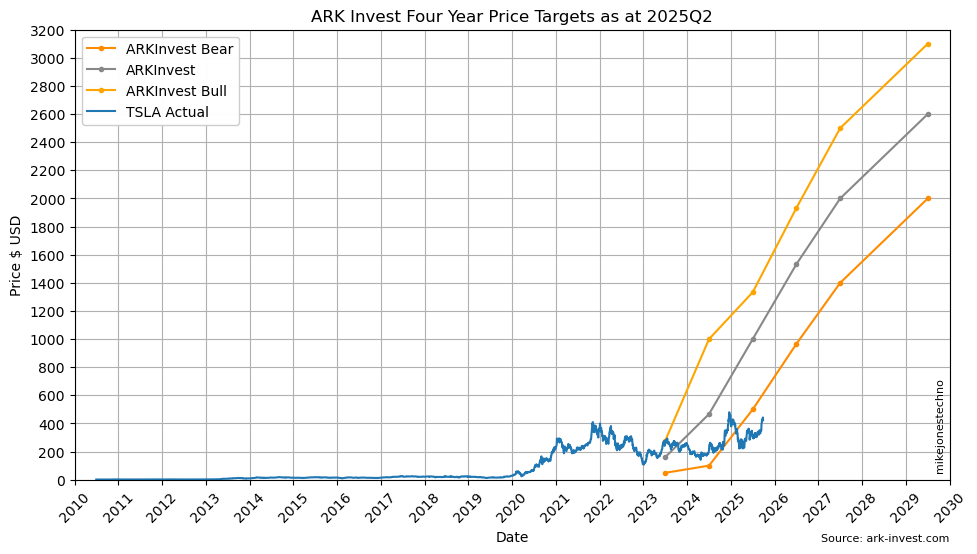

In [8]:
""" Extend simple chart with ARK price targets """
sx_symbol = 'TSLA'
data_column = 'Close'
last_index = df_tsla[data_column].last_valid_index() # pandas timestamp

chart_params = {
    'chart_title': 'ARK Invest Four Year Price Targets as at ' + str(pd.Period(str(last_index), freq='Q') -1), 
    'chart_source': 'Source: ark-invest.com', 
    'y_label': 'Price $ USD', 
    'y_ticks': 200,
    'x_label': 'Date', 
    'x_ticks': 1,
    'top_limit': 3200,
    'data_column': data_column
}

standard_chart = StandardChart(**chart_params)
plt_std, colors = standard_chart.base_chart(df_tsla)

plt_std = plot_rolling_forecast(plt_std, df_targets, 'ARKInvest')   
plt_std.plot(df_tsla.index, df_tsla[data_column], color=colors[0]['color'], label='TSLA Actual')

legend = plt_std.legend(loc='best')
legend.get_frame().set_alpha(0.98)

plt_std.show()

Exponential growth usually requires a long time horizon. 

The S&P 500 (SPX) has a consistent median annual growth rate of 12% and the exponential curve is clearly visible over a 50 year time horizon. Plotting the same [SPX price data on a logarithmic y-axis scale](spx.html) produces a straight line up and to the right. The data is the same, the only change is the y-axis uses a logarithmic scale.

<a href="spx.html" style="text-align: center; display: block"><img src="images/spx_7_0.png" width="400"/> <img src="images/spx_9_0.png" width="400"/></a>

## Logarithmic Perspective

When evaluating long term exponential growth, a logarithmic scale makes it easier to visualize the long term trend.

Plotting the [TSLA prices on a logarithmic y-axis scale](tsla.html) produces a stepped line up and to the right. The data is the same, the only change is the y-axis uses a logarithmic scale.

On a logarithmic y-axis scale the ARK invest four year forecasts appear to be a refined continuation of the existing long term trend.

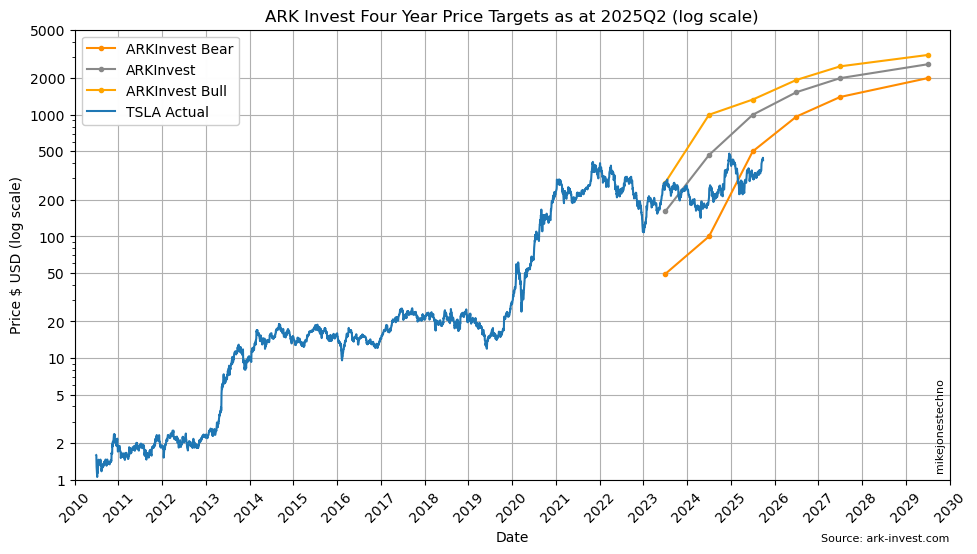

In [9]:
""" LOG SCALE with ARK price targets """

log_chart_params = chart_params.copy()
# remove parameters that are not relevant for log scale
log_chart_params.pop('y_ticks')
log_chart_params.pop('top_limit')
log_chart_params['chart_title'] = log_chart_params['chart_title'] + ' (log scale)'
log_chart_params['y_label'] = chart_params['y_label'] + ' (log scale)'
log_chart_params['y_ticks'] = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]

log_chart = LogChart(**log_chart_params)
plt_log, colors = log_chart.base_chart(df_tsla)

plt_log = plot_rolling_forecast(plt_log, df_targets, 'ARKInvest')
plt_log.plot(df_tsla.index, df_tsla[data_column], color=colors[0]['color'], label='TSLA Actual')

legend = plt_log.legend(loc='best')
legend.get_frame().set_alpha(0.98)
plt_log.show()

### Disruptive Fundamentals

Beware of the short-term noise of quarterly financials, so-called 'technical analysis', option or day-trader YouTubers, and 'expert' financial analysts chasing clients and commissions; long-term investors (planning for five years or longer) should research disruptive technology themselves and study the underlying fundamental business proposition.

In 2022 Ark Invest clarified that their four year model for the 2026 price targets was 'methodologically conservative'. ARK Invest provided an extended eight year price target trajectory to 2030 with a note that forecasting for an eight year time horizon has an increased risk of potential errors. For example "vehicle form factors could change significantly relative to those in our current model, and some of the business opportunities we have not modeled, such as AI-as-a-service, could be more meaningful contributors to Tesla’s financials."

In 2024 Ark Invest's five year forcast for 2029 estimated that 90% of Tesla's enterprise value and earnings would be attributed to the robotaxi business (with 58% likelihood that 2025 would be the first year of robotaxi commercialization). Ark Invest explained the Optimus humanoid robot was not considered a key driver of the 2029 price estimates because meaningful commercialization ramp (important for short-term institutional investors) was not expected until after 2029.

In [10]:
def plot_forecast(plt, df_targets, source, label = ''):
    df_source = df_targets[df_targets['Source'] == source]
                
    # Plot forecast trajectory eg multi year forecasts that were predicted on same date.
    trajectory_forecast = df_source.groupby('ForecastDate')
    for name, group in trajectory_forecast:
        if len(group) > 1:
            if group['Bear'].notna().sum() > 1 and 'bear' in custom_colors[source]:
                plt.plot(group.index, group['Bear'], marker='.', linestyle='dashed', label=source+' Bear', alpha=0.5, color=custom_colors[source]['bear'])
            if group['Base'].notna().sum() > 1:
                if label == '':
                    label = source + ' Base'
                plt.plot(group.index, group['Base'], marker='.', linestyle='dashed', label=label, alpha=0.5, color=custom_colors[source]['base'])
            if group['Bull'].notna().sum() > 1 and 'bull' in custom_colors[source]:
                plt.plot(group.index, group['Bull'], marker='.', linestyle='dashed', label=source+' Bull', alpha=0.5, color=custom_colors[source]['bull'])

            right_limit = group.last_valid_index() + pd.offsets.YearBegin(1)
            # if right_limit > existing xlim then update xlim
            if right_limit.timestamp() > mdates.num2date(plt.xlim()[1]).timestamp():  
                plt.xlim(right=right_limit)     
    return plt

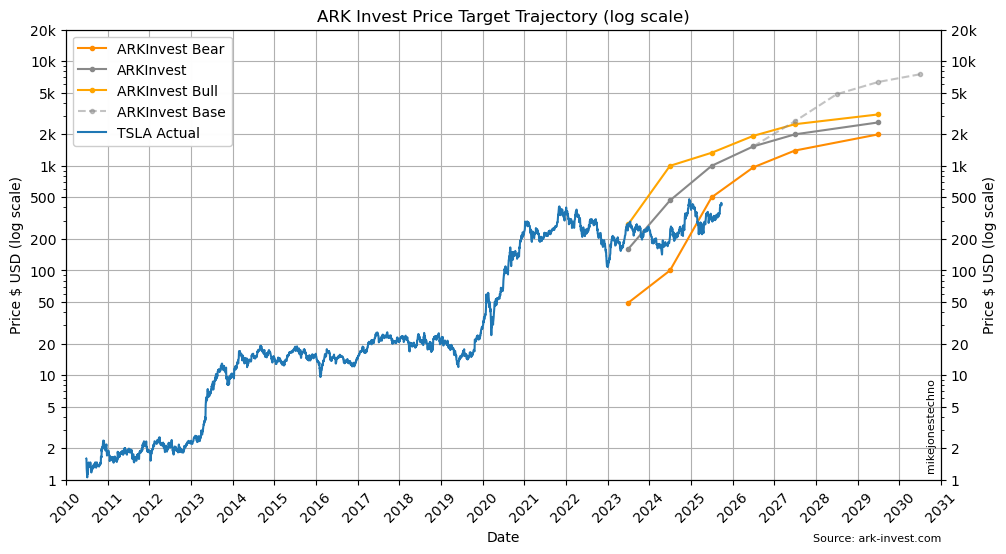

In [11]:
""" LOG SCALE with ARK price targets """

log_chart_params = chart_params.copy()
# remove parameters that are not relevant for log scale
log_chart_params.pop('y_ticks')
log_chart_params.pop('top_limit')
log_chart_params['chart_title'] = 'ARK Invest Price Target Trajectory (log scale)'
log_chart_params['y_label'] = chart_params['y_label'] + ' (log scale)'
log_chart_params['y_ticks'] = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]
log_chart_params['y_secondary'] = True
log_chart_params['human_format'] = True
log_chart = LogChart(**log_chart_params)
plt_log, colors = log_chart.base_chart(df_tsla)

plt_log = plot_rolling_forecast(plt_log, df_targets, 'ARKInvest')
plt_log = plot_forecast(plt_log, df_targets, 'ARKInvest')

plt_log.plot(df_tsla.index, df_tsla[data_column], color=colors[0]['color'], label='TSLA Actual')

legend = plt_log.legend(loc='best')
legend.get_frame().set_alpha(0.98)
plt_log.show()

## Solving The Money Problem

A few retail investors have also published a long-term price target trajectory. There are many factors that are difficult to forecast, and other factors that are not yet known. Investors should also consider a range of possible potential outcomes rather than attempting to forecast a single absolute value.

Before ARK Invest's 2026 price targets were published, Steven Mark Ryan published a 10 year price target trajectory on [Solving the Money Problem](https://www.youtube.com/watch?v=W0OKbs_N51A) on 21 March 2022. SMR had modelled a bear case with 5% probability, a base case with 60% probability, a bull case with 33% probability and a ridiculous hyper-bull case with only 2% probability. These models are regularly updated and available on a small subscriber fee. 

Another retail investor [Cern Basher](https://www.youtube.com/watch?v=J-ezVg-73CA) also shares a 'sum of the parts' price model updated and customized for different retail investor YouTubers. The models reflect the different probabilities and levels of risk or 'sand bagging' each retail investor may accept with a wide range of outcomes based on different assumptions.

The 'weighted average' in SMR's forecast models from 2022 and a more recent forecast model from Cern Basher in 2025 are plotted below. These are not absolute values, the range of possible price targets and the 'cone of uncertainty' beceomes increasingly wider the further the forecasts project into the future.

> ⚠ Disclaimer: _Not financial advice._ Price targets are a FORECAST of what a stock SHOULD be worth, not an estimate of what institutional investors believe or what the stock WILL actually be worth, and each forecast is based on a range of assumptions used in that model. All content is for educational purposes only. 

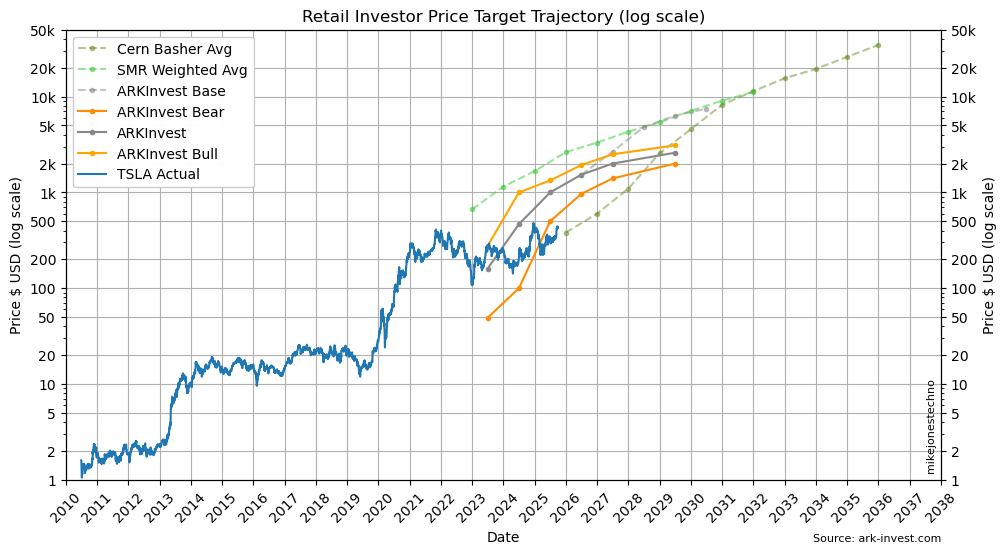

In [12]:
""" LOG SCALE with ARK price targets """

log_chart_params = chart_params.copy()
# remove parameters that are not relevant for log scale
log_chart_params.pop('y_ticks')
log_chart_params.pop('top_limit')
log_chart_params['chart_title'] = 'Retail Investor Price Target Trajectory (log scale)'
log_chart_params['y_label'] = chart_params['y_label'] + ' (log scale)'
#log_chart_params['y_ticks'] = [10, 20, 40, 60, 80, 100, 150, 200, 300, 400, 600, 800, 1000, 2000, 3000, 4000, 6000, 8000, 10000, 15000, 20000]
log_chart_params['y_ticks'] = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]
log_chart_params['y_secondary'] = True
log_chart_params['human_format'] = True
#log_chart_params['start_year'] = 2019
log_chart_params['end_year'] = 2038

log_chart = LogChart(**log_chart_params)
plt_log, colors = log_chart.base_chart(df_tsla)

plt_log = plot_forecast(plt_log, df_targets, 'CernBasher', 'Cern Basher Avg')
plt_log = plot_forecast(plt_log, df_targets, 'SMR', 'SMR Weighted Avg')
#plt_log = plot_forecast(plt_log, df_targets, 'InvestA')
#plt_log = plot_forecast(plt_log, df_targets, 'RandyKirk')

plt_log = plot_forecast(plt_log, df_targets, 'ARKInvest')
plt_log = plot_rolling_forecast(plt_log, df_targets, 'ARKInvest')

plt_log.plot(df_tsla.index, df_tsla[data_column], color=colors[0]['color'], label='TSLA Actual')

legend = plt_log.legend(loc='best')
legend.get_frame().set_alpha(0.98)

plt_log.show()

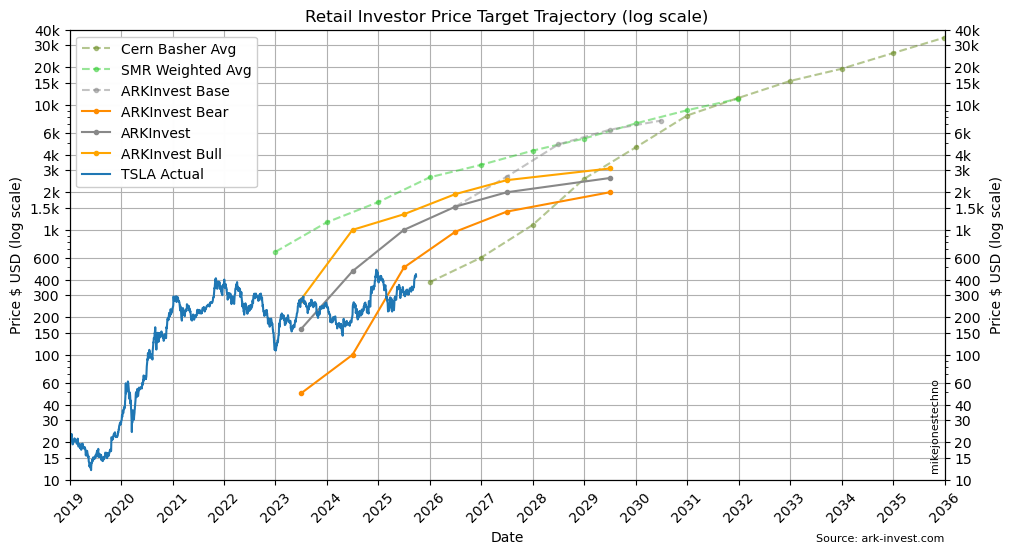

In [13]:
""" LOG SCALE with ARK price targets """

log_chart_params = chart_params.copy()
# remove parameters that are not relevant for log scale
log_chart_params.pop('y_ticks')
log_chart_params.pop('top_limit')
log_chart_params['chart_title'] = 'Retail Investor Price Target Trajectory (log scale)'
log_chart_params['y_label'] = chart_params['y_label'] + ' (log scale)'
#log_chart_params['y_ticks'] = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]
#log_chart_params['y_ticks'] = [10, 20, 30, 50, 100, 200, 300, 500, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 50000]
#log_chart_params['y_ticks'] = [10, 20, 30, 50, 70, 100, 200, 300, 500, 700, 1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 30000, 50000]
log_chart_params['y_ticks'] = [10, 15, 20, 30, 50, 70, 100, 150, 200, 300, 500, 700, 1000, 1500, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 30000, 50000]
log_chart_params['y_secondary'] = True
log_chart_params['human_format'] = True
log_chart_params['start_year'] = 2019
log_chart_params['end_year'] = 2036

log_chart = LogChart(**log_chart_params)
plt_log, colors = log_chart.base_chart(df_tsla)

plt_log = plot_forecast(plt_log, df_targets, 'CernBasher', 'Cern Basher Avg')
plt_log = plot_forecast(plt_log, df_targets, 'SMR', 'SMR Weighted Avg')
#plt_log = plot_forecast(plt_log, df_targets, 'InvestA')
#plt_log = plot_forecast(plt_log, df_targets, 'RandyKirk')

plt_log = plot_forecast(plt_log, df_targets, 'ARKInvest')
plt_log = plot_rolling_forecast(plt_log, df_targets, 'ARKInvest')

plt_log.plot(df_tsla.index, df_tsla[data_column], color=colors[0]['color'], label='TSLA Actual')

legend = plt_log.legend(loc='best')
legend.get_frame().set_alpha(0.98)

plt_log.show()